# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.144589e+01     7.539939e+00
 * time: 0.005158185958862305
     1     2.685356e+01     5.022745e+00
 * time: 0.016000986099243164
     2     1.985151e+01     6.157994e+00
 * time: 0.04069209098815918
     3     1.182222e+01     1.495619e+00
 * time: 0.06991219520568848
     4     1.057522e+01     1.882727e+00
 * time: 0.09006309509277344
     5     1.026107e+01     9.401322e-01
 * time: 0.10967516899108887
     6     9.835443e+00     1.086938e+00
 * time: 0.13053297996520996
     7     9.436496e+00     9.100877e-01
 * time: 0.15052509307861328
     8     9.140299e+00     5.378101e-01
 * time: 0.17060208320617676
     9     9.098254e+00     1.002641e+00
 * time: 0.1855180263519287
    10     9.053639e+00     9.600976e-01
 * time: 0.2002100944519043
    11     9.018334e+00     7.512060e-01
 * time: 0.2147681713104248
    12     8.948805e+00     3.615548e-01
 * time: 0.2300732135772705
    13     8.885999e+00     4.004959e-01
 * time: 0

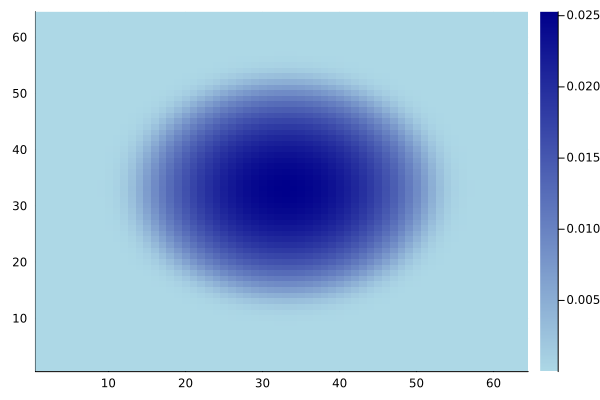

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)